## Building the Perceptron Classifier

For the initial implementation, I'll be focusing on binary classification with the Perceptron. I could expand this to handle multi-class classification through the one-vs-rest (OvR) method in the future if required.

**What is a Typical Perceptron Model? What would we need?**

- **Hyperparameters**: Hyperparameters are set before training begins and guide the training process. For the Perceptron, we are dealing with two main hyperparameters:
  - The **learning rate**, which influences the magnitude of weight adjustments during training.
  - The **number of epochs**, or how many times we'll loop through our training dataset. This acts as a stopping criterion, particularly important if our features aren't linearly separable, to avoid endlessly updating weights.

- **Parameters**: Parameters are learned from the data during training. These include the **weights** and **bias** of our model, which are adjusted through training to improve prediction accuracy.

- **Training Loop & Evaluation**: A structured training loop is essential. It allows for the iterative adjustment of our model's parameters. Equally critical is having a mechanism for making predictions and evaluating their accuracy, which helps in fine-tuning our model's performance.

- **Weight Update Mechanism**: We need a solid strategy for updating the model's weights based on the evaluation of its predictions, ensuring continuous improvement in its performance.

In [1]:
# Hyperparameters or Tuning Parameters for the model.
eta = 0.01
epochs = 10

##Parameters for the model are Weight and Bias.
##The Size (or Shape rather as we are dealing with Vector and Matrices) of the weight and Bias would depend on the Shape of the Input feature.

##For First Example, Let's start with the classic Iris Flower dataset. In this dataset, we have 4 Input features and a Flower label as the Target Variable.

### In this steps, let's load the dataset and then initialize the parameters.

In [2]:
import pandas as pd

Iris_dataset_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', Iris_dataset_url)
data = pd.read_csv(Iris_dataset_url,
                header=None,
                encoding='utf-8')

print(data.head())

print(data[4].unique())

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [3]:
print("Unique species before dropping 'Iris-versicolor':", data[4].unique())
data = data[data[4] != 'Iris-versicolor']
print("Unique species after dropping 'Iris-versicolor':", data[4].unique())
print("NaN values present in 'Species':", data[4].isnull().any())


Unique species before dropping 'Iris-versicolor': ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Unique species after dropping 'Iris-versicolor': ['Iris-setosa' 'Iris-virginica']
NaN values present in 'Species': False


## Now, let's visualize the data that we have so far

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


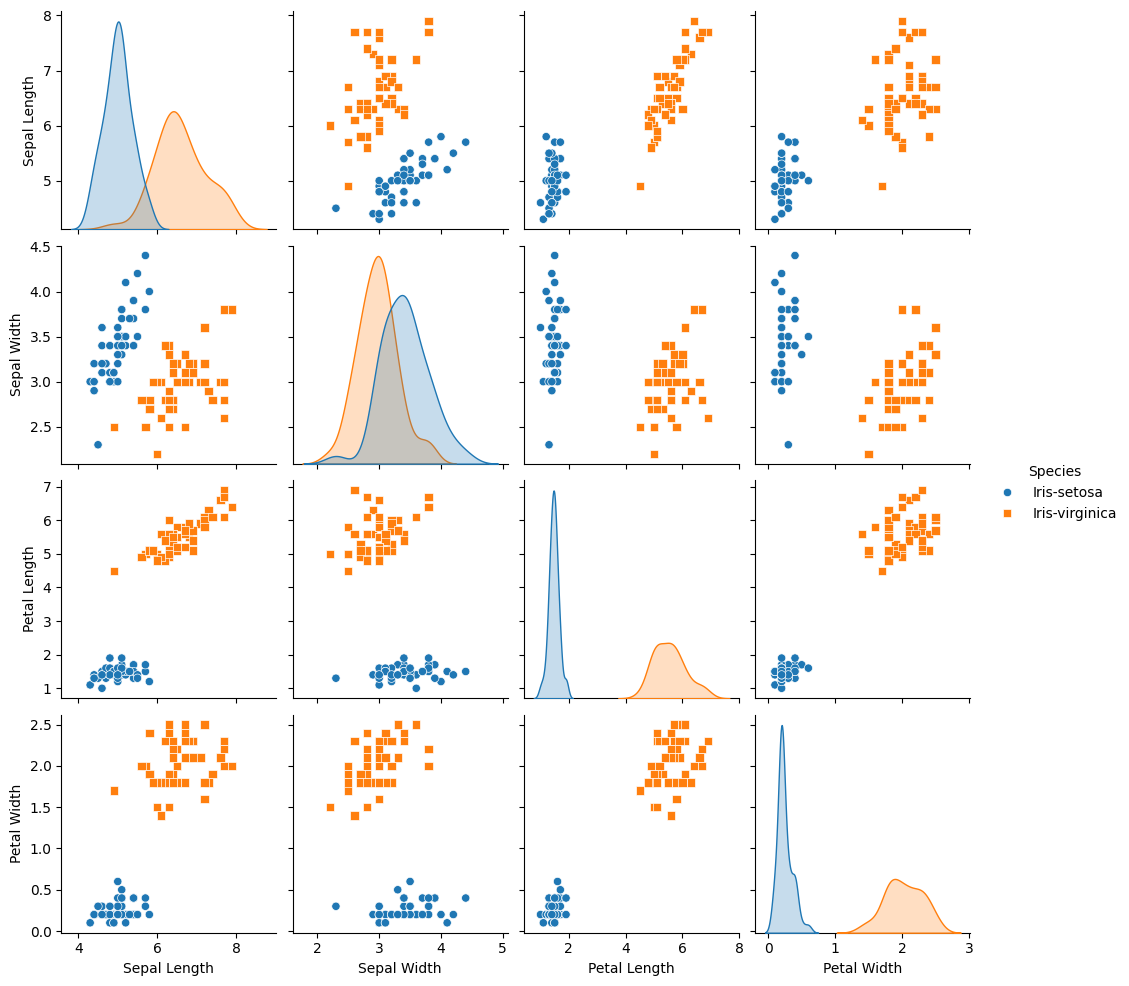

In [4]:
import seaborn as sns
import numpy as np
print (data.head())
data.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

sns.pairplot(data, hue='Species', markers=["o", "s"])

## So Now that we have a general Idea on how our dataset looks, how the different features are distributed. Let's Start with the parameters for the Perceptron model.

### We'll need to create the weight of similar shape as the input features.

In [5]:
# the last column 'Species' is the target variable.
X = data.iloc[:, :-1].values  # all columns except the last one will be taken as the features
y = data.iloc[:, -1].values  # only the last column is the target variable

###We'll also need to assign the (this is referred as Encoding) target labels into binary form, 0 and 1. we can use a LabelEncoder from sklearn library or a simple mapping

In [7]:
from sklearn.preprocessing import LabelEncoder

# Let's Convert 'Iris-setosa' to 0 and 'Iris-virginica' to 1
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


### Here for the initialization purpose of the variable we will use a random number generator. random number generators are useful for the reproducibility of our models.


## Building the Perceptron Pipeline

### Now that we have the data to train the model, we cab start building the functions that will serve as the building blocks of the perceptron pipeline. The perceptron model learning process is straightforward: we have input data and target variables. Our goal is to learn model weights in such a manner that we can correctly classify the input data points and assign the proper class label. Here are the functions we will need to build the Perceptron Pipeline:

1. **Net Input Function**: This function calculates the dot product between the input data 'X' and the weights 'W', and then adds the 'bias'. This value represents the weighted sum of the inputs plus a bias term, this is used for the model to adjust its decision boundary.

2. **Prediction Function**: To make predictions, we use the Unit Step Function. Essentially, if the output of the Net Input function is greater than a threshold, we assign one class label; otherwise, we assign the second class label.

3. **Updating the Weights**: The method for calculating weight updates is as follows: first, we calculate the difference between the Predicted Label and the Actual Label and multiply this by the Learning Rate to get the Update value. This update value is then multiplied with the Input data to get the new value for the weight. These updated weights are used in subsequent predictions, allowing the model to learn from its mistakes and improve its accuracy over time.


In [8]:
def net_input(X, weight):
    return np.dot(X, weight)

def predict(X, weight):
    net_inp = net_input(X, weight)
    return np.where(net_inp >= 0.0, 1, 0)

In [9]:
def fit(X, y, eta, epochs):
    rgen = np.random.RandomState(1)
    weight = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    errors = []

    for _ in range(epochs):
        err = 0
        for xi, target in zip(X, y):
            xi_with_bias = np.insert(xi, 0, 1)
            prediction = predict(xi_with_bias, weight)
            update = eta * (target - prediction)
            weight += update * xi_with_bias
            err += int(update != 0.0)
        errors.append(err)
    return weight, errors


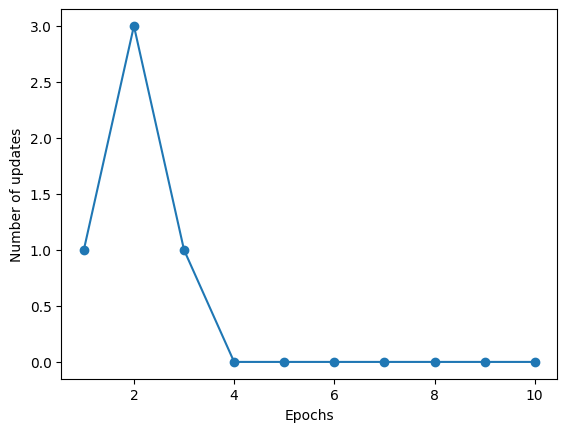

In [11]:
import matplotlib.pyplot as plt

weight, errors = fit(X, y, eta, epochs)
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [12]:
print(weight)

[ 0.00624345 -0.03111756 -0.03928172  0.06727031  0.05265408]


## Now, Let's vislize the decision boundary Plotting the decision boundary for the perceptron model. Here, we will face one issue, our input data contains 4 features. And, dealing with more than two features is complex because the decision boundary in higher dimensions is not a line but a hyperplane. Here is a blog that goes into decision boundaries in a detailed manner:
[Lines, Planes and HyperPlanes](https://medium.com/@jayantnehra18/lines-planes-and-hyperplanes-in-linear-algebra-for-machine-learning-part-3-829497d5f0c9)



### For visualization purposes, I'll take two features for now. From the Pair plots, we can see the most impactful features and only take those. If we want to take in most distinguishing two features then we can update the 'X' dataframe.

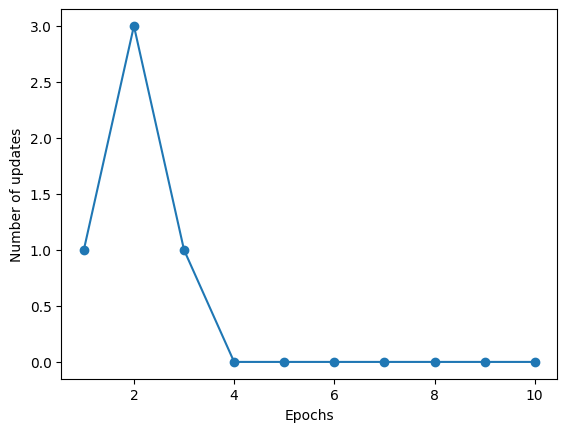

In [13]:
X_reduced = X[:, [0, 2]]
weight, errors = fit(X_reduced, y, eta, epochs)
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

### Now, we can plot the decision boundary and visualize in 2D Spacew that how well our learned model is separating the data.

In [15]:
def plot_decision_boundary(X_reduced, y, weight):
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', s=50, label='Data')

    # Decision boundary calculation
    x1_min, x1_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
    x2_min, x2_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))

    # Adjusting for bias term
    grid_array = np.array([xx1.ravel(), xx2.ravel()]).T
    grid_array_with_bias = np.insert(grid_array, 0, 1, axis=1)

    Z = predict(grid_array_with_bias, weight)
    Z = Z.reshape(xx1.shape)

    # Plotting the decision boundary
    plt.contour(xx1, xx2, Z, alpha=0.2, levels=[-1, 0, 1], linestyles=['--', '-', '--'])
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.show()



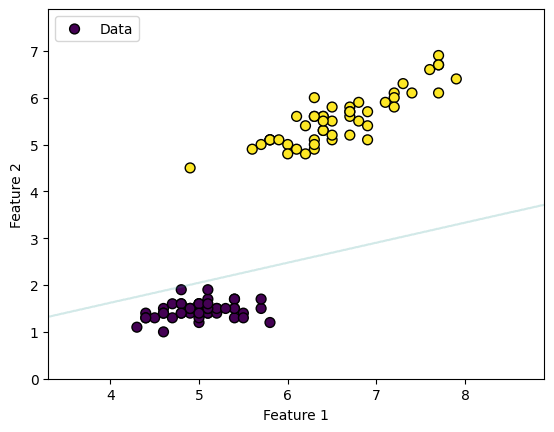

In [16]:
plot_decision_boundary(X_reduced, y, weight)